Please select an image you would like to test on this algorithm


Saving Test Image 1.png to Test Image 1.png
PSNR (Noisy Image vs Original Image): 54.15 dB
PSNR (Denoised Image vs Original Image): 49.58 dB
SSIM (Noisy Image vs Original Image): 0.6940
SSIM (Denoised Image vs Original Image): 0.9922


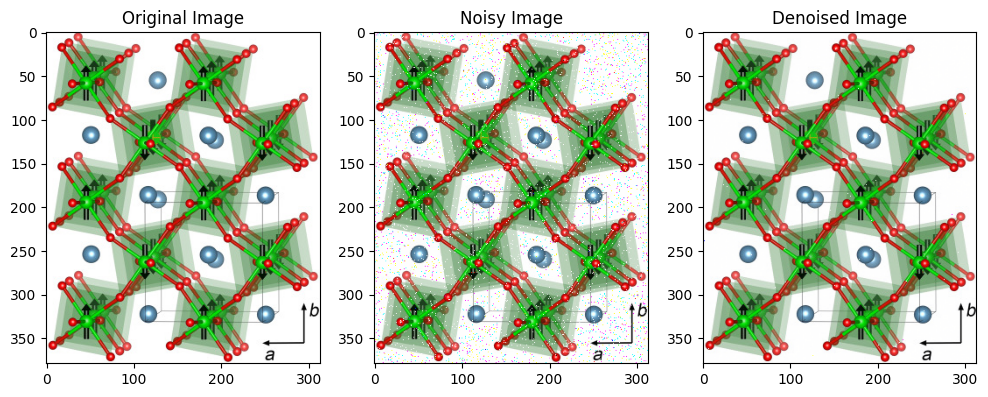

In [1]:
import pywt
import numpy as np
from PIL import Image
from google.colab import files
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

#for result reproducibility, I applied same random noise
np.random.seed(42)
# Upload image file
print("Please select an image you would like to test on this algorithm")
uploaded = files.upload()

# Load uploaded image file
selected_image = next(iter(uploaded))
img = Image.open(selected_image)
origin_image = np.array(img)

# noise addition
noisy_image = origin_image + 0.5 * np.random.randn(*origin_image.shape)

# file dimension matching
denoised_image_shape = origin_image.shape

# Denoising using wavelet
coeffs = pywt.dwt2(noisy_image, 'haar')
LL, (LH, HL, HH) = coeffs

# Thresholding
thresh = 1.1
LH = pywt.threshold(LH, thresh, mode='soft')
HL = pywt.threshold(HL, thresh, mode='soft')
HH = pywt.threshold(HH, thresh, mode='soft')

# Denoiised Image reconstruction
denoised_image= pywt.idwt2((LL, (LH, HL, HH)), 'haar')
denoised_image = denoised_image[:denoised_image_shape[0], :denoised_image_shape[1]]

# PSNR Calculation function
def calculate_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# The calculated PSNR values
psnr_noisy = calculate_psnr(origin_image, noisy_image)
psnr_denoised = calculate_psnr(origin_image, denoised_image)

# SSIM calculation function
def calculate_ssim(image1, image2):
    ssim_value = ssim(image1.astype(np.uint8), image2.astype(np.uint8), win_size=7, channel_axis=-1)
    return ssim_value

ssim_noisy = calculate_ssim(origin_image, noisy_image)
ssim_denoised = calculate_ssim(origin_image, denoised_image)

# Print evaluation metrics
print(f"PSNR (Noisy Image vs Original Image): {psnr_noisy:.2f} dB")
print(f"PSNR (Denoised Image vs Original Image): {psnr_denoised:.2f} dB")
print(f"SSIM (Noisy Image vs Original Image): {ssim_noisy:.4f}")
print(f"SSIM (Denoised Image vs Original Image): {ssim_denoised:.4f}")

# Plot original, noisy, and denoised images
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(origin_image.astype(np.uint8))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(noisy_image.astype(np.uint8))
plt.title('Noisy Image')

plt.subplot(133)
plt.imshow(denoised_image.astype(np.uint8))
plt.title('Denoised Image')
plt.show()